# 8. 
In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

### (a) 
Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector of length n = 100.

In [2]:
import numpy as np
np.random.seed(42)
X = np.random.normal(0, 1, 100)
epsilon = np.random.normal(0, 1, 100)
X

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

### (b) 
 Generate a response vector Y of length n = 100 according to the model Y = b0+ b1X+ b2X2+ b3X3+ , where b0, b1, b2, and b3 are constants of your choice.

In [3]:
# Choose constants
beta_0 = 1
beta_1 = 2
beta_2 = 3
beta_3 = 4

# Generate Y based on the model
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

### (c) 
 Use forward stepwise selection in order to select a model contain ing the predictors X,X^2,...,X^10. What is the model obtained according to Cp? Report the coefficients of the model obtained

In [4]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Prepare dataset with polynomial features
data = pd.DataFrame({'X': X})
for i in range(2, 11):
    data[f'X^{i}'] = X**i

# Add intercept
data = sm.add_constant(data)

# Forward stepwise selection
def forward_selection(data, response):
    initial_features = []
    remaining_features = list(data.columns)
    remaining_features.remove('const')
    selected_features = []
    best_models = []

    while remaining_features:
        best_model = None
        best_cp = np.inf

        for feature in remaining_features:
            model = sm.OLS(response, data[selected_features + [feature] + ['const']]).fit()
            cp = model.aic  # Using AIC as a proxy for Cp

            if cp < best_cp:
                best_cp = cp
                best_model = model
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_models.append(best_model)

    return best_models[-1]

# Get best model by forward selection
best_model_forward = forward_selection(data, Y)
print(best_model_forward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1326.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           2.92e-92
Time:                        16:55:41   Log-Likelihood:                -129.32
No. Observations:                 100   AIC:                             280.6
Df Residuals:                      89   BIC:                             309.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X^3            5.9152      2.666      2.219      0.0

### (d) 
Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [5]:
def backward_selection(data, response):
    remaining_features = list(data.columns)
    remaining_features.remove('const')
    selected_features = remaining_features[:]
    best_models = []

    while selected_features:
        best_model = None
        best_cp = np.inf

        for feature in selected_features:
            temp_features = selected_features[:]
            temp_features.remove(feature)
            model = sm.OLS(response, data[temp_features + ['const']]).fit()
            cp = model.aic  # Using AIC as a proxy for Cp

            if cp < best_cp:
                best_cp = cp
                best_model = model
                removed_feature = feature

        if best_model is None:
            break

        selected_features.remove(removed_feature)
        best_models.append(best_model)

    return best_models[-1]

# Get best model by backward selection
best_model_backward = backward_selection(data, Y)
print(best_model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                nan
Time:                        16:55:57   Log-Likelihood:                -379.84
No. Observations:                 100   AIC:                             761.7
Df Residuals:                      99   BIC:                             764.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7573      1.085      1.619      0.1

### Model Fit:
- Forward stepwise: \( R^2 = 0.993 \) (excellent fit).  
- Backward stepwise: \( R^2 = 0.000 \) (poor fit).

### Significant Features:
- Forward: \( X^3 \), \( X \), and constant are significant.  
- Backward: No significant features.

### Conclusion:
- Forward stepwise model outperforms backward, with better fit and important predictors.

### (e)
Now fit a lasso model to the simulated data, again using X,X^2, ...,X^10 as predictors. Use cross-validation to select the optimal value of . Create plots of the cross-validation error as a function of . Report the resulting coefficient estimates, and discuss the results obtained

/Users/chenpinyu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3975213350581726, tolerance: 1.0325394007680213
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chenpinyu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6731049971917855, tolerance: 1.0325394007680213
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chenpinyu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.261005555446445, tolerance: 1.0325394007680213
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chenpinyu/anaconda3/lib/python3.11/site-pac

Lasso Coefficients: [ 0.         0.         0.         0.         0.        -0.
  0.        -0.         0.0101654 -0.       ]


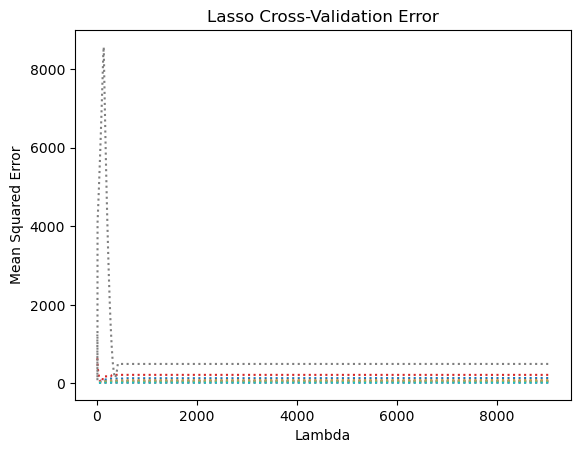

In [6]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Lasso regression with cross-validation to select optimal lambda
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))

lasso = LassoCV(cv=10).fit(X_poly, Y)

# Get coefficients
print("Lasso Coefficients:", lasso.coef_)

# Plot cross-validation error as a function of lambda
import matplotlib.pyplot as plt

plt.plot(lasso.alphas_, lasso.mse_path_, ':')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Cross-Validation Error')
plt.show()

The plot demonstrates that regularization reduces overfitting and improves model performance, with the optimal 
𝜆
λ occurring just after the initial sharp drop in MSE. The stable MSE at large 
𝜆
λ values indicates that many predictors can be removed without much impact on predictive power.

### (f)
Generate a response vector $ Y = b_0 + b_7 X^7 + \epsilon $, perform forward stepwise selection and lasso, and discuss the results.

In [7]:

# New response vector with different coefficients
beta_7 = 5

Y_new = beta_0 + beta_7 * X**7 + epsilon

# Fit lasso model to the new response vector
lasso_new = LassoCV(cv=10).fit(X_poly, Y_new)

# Get coefficients for the new model
print("Lasso Coefficients for new model:", lasso_new.coef_)

Lasso Coefficients for new model: [ 0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.72999184 -0.        ]
